In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("../Dataset_5971.csv")
df.LABEL = df.LABEL.str.lower()

### Basic Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [8]:
df.nunique()

LABEL       3
TEXT     5949
URL         2
EMAIL       2
PHONE       2
dtype: int64

### EDA

/home/artur/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LABEL'}, xlabel='LABEL', ylabel='count'>

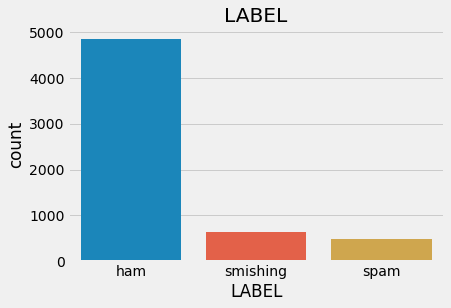

In [9]:
plt.title("LABEL")
sns.countplot('LABEL', data=df)

/home/artur/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URL', ylabel='count'>

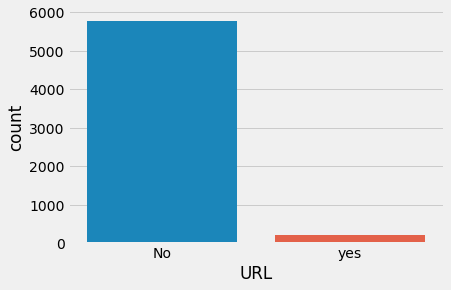

In [10]:
sns.countplot('URL', data=df)

/home/artur/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMAIL', ylabel='count'>

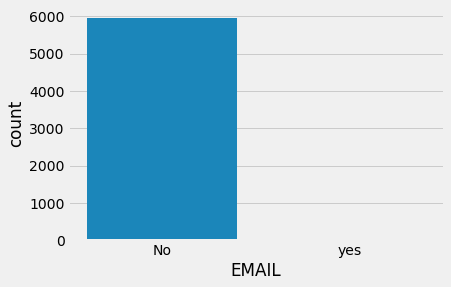

In [12]:
sns.countplot('EMAIL', data=df)

/home/artur/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PHONE', ylabel='count'>

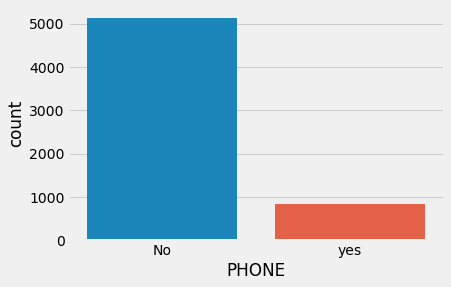

In [11]:
sns.countplot('PHONE', data=df)

(0.0, 300.0)

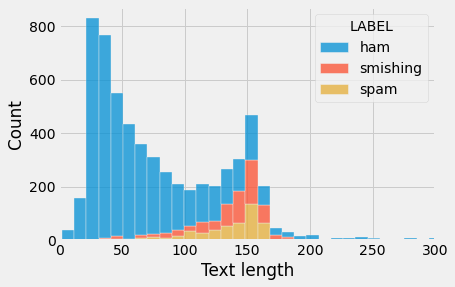

In [13]:
sns.histplot(x=df.TEXT.apply(len), hue = df.LABEL, multiple="stack")
plt.xlabel('Text length')
plt.xlim((0,300))

In [14]:
df.LABEL = (df.LABEL.str.lower()=='smishing')*1
df.URL = (df.URL=='yes')*1
df.EMAIL = (df.EMAIL=='yes')*1
df.PHONE = (df.PHONE=='yes')*1

<AxesSubplot:>

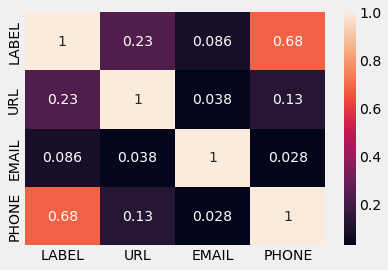

In [16]:
sns.heatmap(df.corr(), annot=True)

In [93]:
# df.LABEL = df.LABEL.apply(lambda x: x if x=="smishing" else "legitimate")

In [22]:
df = pd.read_csv("Dataset_5971.csv")
df.LABEL = df.LABEL.str.lower()

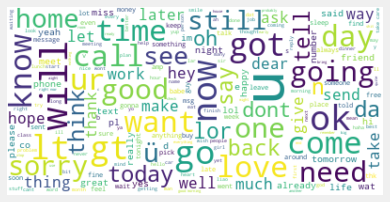

In [47]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60,
                      background_color='white',
                     ).generate(" ".join(df[df.LABEL=='ham'].TEXT.str.lower().tolist()))

plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

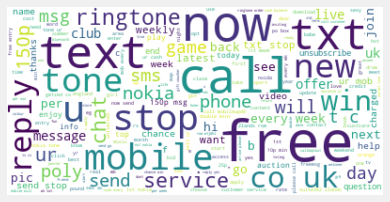

In [46]:
wordcloud = WordCloud(max_font_size=60,
                      background_color='white',
                     ).generate(" ".join(df[df.LABEL=='spam'].TEXT.str.lower().tolist()))

plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

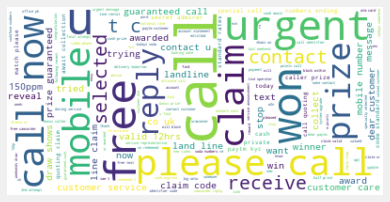

In [48]:
wordcloud = WordCloud(max_font_size=60,
                      background_color='white',
                     ).generate(" ".join(df[df.LABEL=='smishing'].TEXT.str.lower().tolist()))

plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

In [67]:
df["pre"] = df.TEXT.apply(preprocess)

In [69]:
df[df.pre.str.contains('URL')].URL.value_counts()

yes    174
No      22
Name: URL, dtype: int64